<a href="https://colab.research.google.com/github/RainiBenaiah/Data-Preprocessing/blob/main/models/customer_spending_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Customer Spending Behavior with Linear Regression and XGBoost**

 We are predicting customer spending behavior using the preprocessed dataset. The target variable will be `purchase_amount`


- Target (y) - `purchase_amount`
- Features (X) - Numerical & encoded categorical variables

In [13]:
# Import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns


## **1. Linear Regression**

In [6]:
# load dataset
path = '/content/drive/MyDrive/final_dataset_ready_pld14.csv'
data = pd.read_csv(path)

print("Data Shape:", data.shape)
print(data.head())


Data Shape: (740, 22)
   customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 163            1022            220.0    2024-01-22   
1                 163            1044            495.0    2024-02-13   
2                 191            1034             94.0    2024-02-03   
3                 191            1218             94.0    2024-02-03   
4                 106            1047            397.0    2024-02-16   

  product_category  customer_rating  purchase_amount_aug customer_id_new  \
0        Groceries              2.7             0.375875            A101   
1           Sports              3.0             1.000000            A101   
2      Electronics              3.0             0.090399            A102   
3      Electronics              3.0             0.090399            A102   
4           Sports              1.7             0.743732            A102   

  social_media_platform  engagement_score  ...  customer_engagement_score  \
0          

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# define the target variable
target = "purchase_amount_aug"

# select relevant numerical features
features = [
    "customer_rating", "engagement_score", "customer_engagement_score",
    "rolling_avg_3", "rolling_avg_5", "total_purchases",
    "review_sentiment_encoded"
]

# create X and y
X = data[features]
y = data[target]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)


Train Set: (592, 7) (592,)
Test Set: (148, 7) (148,)


In [8]:
# initialize model
lr_model = LinearRegression()

# train model
lr_model.fit(X_train, y_train)

# make predictions
y_pred = lr_model.predict(X_test)

# evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 0.0794
Mean Squared Error (MSE): 0.0117
Root Mean Squared Error (RMSE): 0.1081
R-squared (R²): 0.8022


In [9]:
# get feature importance
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(feature_importance)


                     Feature  Coefficient
3              rolling_avg_3     1.100662
2  customer_engagement_score     0.668176
5            total_purchases     0.000519
0            customer_rating    -0.002816
6   review_sentiment_encoded    -0.004615
1           engagement_score    -0.205322
4              rolling_avg_5    -0.378556


## **2. XGBoost**

In [10]:
# initialize model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

# train model
xgb_model.fit(X_train, y_train)

# predictions
y_pred_xgb = xgb_model.predict(X_test)

# evaluation Metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"R-squared (R²): {r2_xgb:.4f}")


Mean Absolute Error (MAE): 0.0523
Mean Squared Error (MSE): 0.0070
Root Mean Squared Error (RMSE): 0.0838
R-squared (R²): 0.8809


## **Model Comparison**

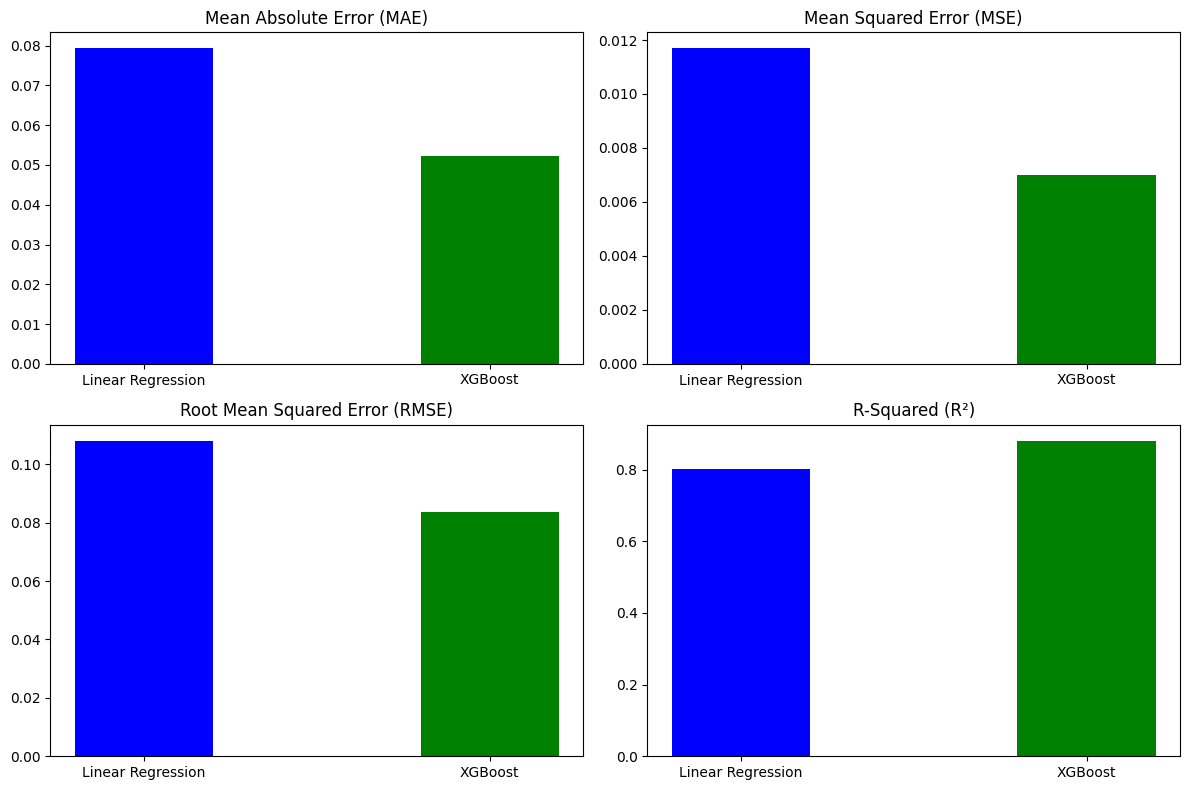

In [11]:
# define the models and their metrics
models = ["Linear Regression", "XGBoost"]
mae_scores = [0.0794, 0.0523]
mse_scores = [0.0117, 0.0070]
rmse_scores = [0.1081, 0.0838]
r2_scores = [0.8022, 0.8809]

# Set up the figure and axis
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Define bar width and x locations
bar_width = 0.4
x = np.arange(len(models))

# Plot each metric
ax[0, 0].bar(x, mae_scores, color=["blue", "green"], width=bar_width)
ax[0, 0].set_title("Mean Absolute Error (MAE)")
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(models)

ax[0, 1].bar(x, mse_scores, color=["blue", "green"], width=bar_width)
ax[0, 1].set_title("Mean Squared Error (MSE)")
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(models)

ax[1, 0].bar(x, rmse_scores, color=["blue", "green"], width=bar_width)
ax[1, 0].set_title("Root Mean Squared Error (RMSE)")
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(models)

ax[1, 1].bar(x, r2_scores, color=["blue", "green"], width=bar_width)
ax[1, 1].set_title("R-Squared (R²)")
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(models)

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
def compare_and_save_best_model(models, metrics, X_test, y_test):
    """
    Compares multiple models based on R² score, selects the best model, saves it,
    and generates sample predictions.
    """

    # select best model based on highest R² score
    best_name = max(metrics, key=lambda model: metrics[model]["R²"])
    best_model = models[best_name]

    print(f" Best Model: {best_name}")

    # save the best model
    joblib.dump(best_model, "best_customer_spending_model.pkl")

    # generate sample predictions
    y_pred = best_model.predict(X_test[:10])  # predict on first 10 test samples
    sample_predictions = pd.DataFrame({"Actual": y_test[:10].values, "Predicted": y_pred})
    sample_predictions.to_csv("sample_predictions.csv", index=False)

    print("Best model saved as 'best_customer_spending_model.pkl'")
    print("Sample predictions saved as 'sample_predictions.csv'")


linear_regressor = lr_model
xgb_regressor = xgb_model


models = {
    "Linear Regression": linear_regressor,
    "XGBoost": xgb_regressor
}

metrics = {
    "Linear Regression": {"MAE": 0.0794, "MSE": 0.0117, "RMSE": 0.1081, "R²": 0.8022},
    "XGBoost": {"MAE": 0.0523, "MSE": 0.0070, "RMSE": 0.0838, "R²": 0.8809}
}

compare_and_save_best_model(models, metrics, X_test, y_test)


 Best Model: XGBoost
Best model saved as 'best_customer_spending_model.pkl'
Sample predictions saved as 'sample_predictions.csv'
     Actual  Predicted
0  0.335043   0.324978
1  0.820770   0.783236
2  0.871376   0.873607
3  0.574748   0.595636
4  0.335043   0.336846


In [18]:
sample_predictions_path = '/content/sample_predictions.csv'
sample_dataset = pd.read_csv(sample_predictions_path)
sample_dataset.head()


,Actual,Predicted
0,0.335043,0.324978
1,0.820770,0.783236
2,0.871376,0.873607
3,0.574748,0.595636
4,0.335043,0.336846


from matplotlib import pyplot as plt
_df_0['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)